# Lab 9: Eigenvalue Problem Demo

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import scipy.sparse.linalg

In [26]:
BOXSIZE = 8
ND = 6000 #600
DELTAX = BOXSIZE / ND
HBAR = 1 
ALPHA = 0.4

x = np.linspace(-BOXSIZE / 2, BOXSIZE / 2, ND + 1)

def V(x):
    return ALPHA * x**4 - 2 * x **2 + 1/ALPHA

H = np.zeros((ND + 1, ND + 1))

# Define the potential function
def V(x):
    return ALPHA * x**4 - 2 * x **2 + 1/ALPHA

# Compute the kinetic part of the Hamiltonian matrix
kinetic = -(0.5 / DELTAX**2) * (np.diag(-2 * np.ones(ND + 1)) + np.diag(np.ones(ND), k=1) + np.diag(np.ones(ND), k=-1))

# Compute the potential part of the Hamiltonian matrix
potential = np.diag(V(x))

# Compute the Hamiltonian matrix
H = kinetic + potential

# Print the first 4x4 elements of H
print(H[:4, :4])

# print the first 4x4 elements of H
print(H[:4,:4])

[[ 562572.9        -281250.               0.               0.        ]
 [-281250.          562572.7848647  -281250.               0.        ]
 [      0.         -281250.          562572.66985872 -281250.        ]
 [      0.               0.         -281250.          562572.55498199]]


In [27]:
#%%timeit
# standard method
# Es, psi = scipy.linalg.eigh(H)
#print(Es)

In [28]:
#%%timeit
# find the lowest eigenvalues and corresponding eigenvectors of H using ARPACK
# Es, psis = scipy.sparse.linalg.eigsh(H, k=2, which='SM')
#print(Es)

In [29]:
#%%timeit
# # shift-invert mode is faster for finding these
# Es, psis = scipy.sparse.linalg.eigsh(H, k=2, sigma=0, which='LM')
#print(Es)

In [30]:
Es, psis = scipy.sparse.linalg.eigsh(H, k=2, sigma=0, which='LM')

E_0 = Es[0]
E_1 = Es[1]
psi_0 = psis[:, 0]
psi_1 = psis[:, 1]

# normalize the wave functions
psi_0 /= np.sqrt(np.sum(psi_0.conjugate() * psi_0) * DELTAX)
psi_1 /= np.sqrt(np.sum(psi_1.conjugate() * psi_1) * DELTAX)

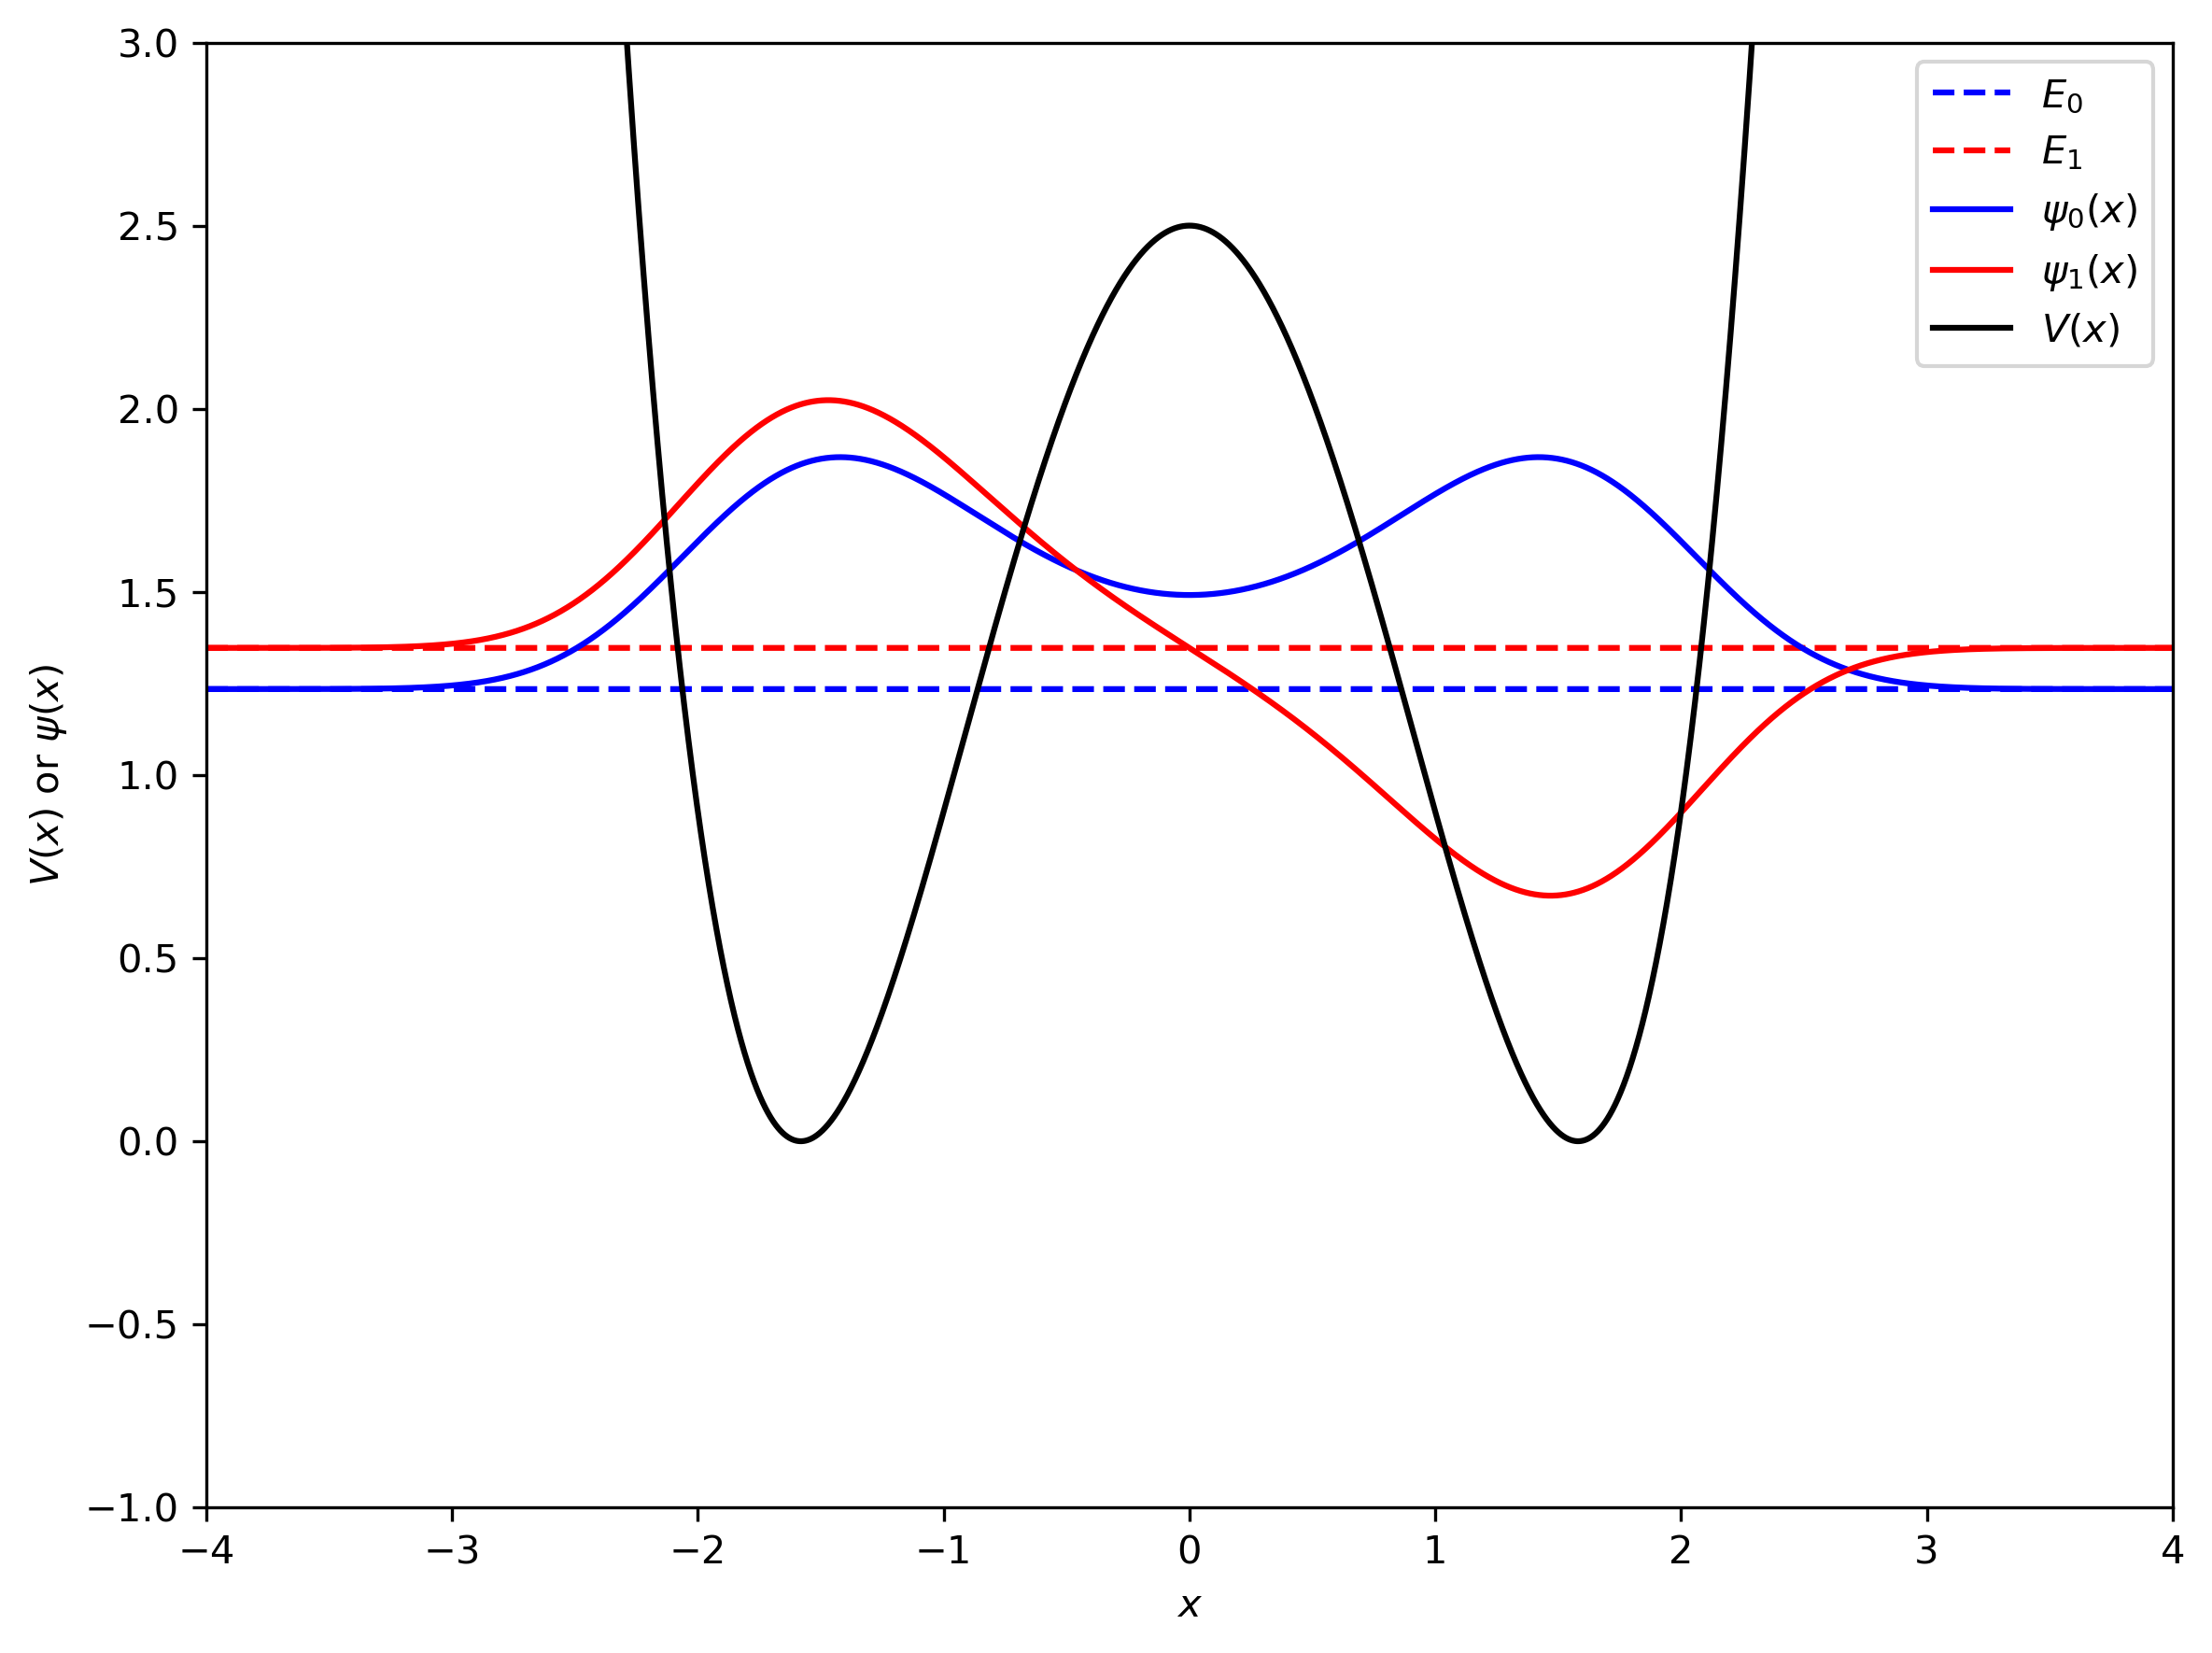

In [31]:
xmin, xmax, ymin, ymax = -BOXSIZE/2, BOXSIZE/2, -1, 3
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, E_0*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, E_1*np.ones_like(x), 'r--', label=f"$E_1$")
plt.plot(x, psi_0 + E_0, 'b-', label=f"$\psi_0(x)$")
plt.plot(x, psi_1 + E_1, 'r-', label=f"$\psi_1(x)$")
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("ho_e0_e1.pdf")
plt.show()

## Manual power method

Let's try the power method manually for the lowest eigenvalue of the following matrix.

Following lecture, we will need to first invert the matrix.

In [32]:
n_iter = 80
u = [np.ones(ND + 1)]
lambda_0 = [np.dot(u[-1].conjugate(), H @ u[0]) / np.dot(u[-1].conjugate(), u[0])]
Hinv = scipy.linalg.inv(H)
for i in range(n_iter):
    u.append(Hinv @ u[-1])
    u[-1] /= (np.sum(u[-1].conjugate() * u[-1]) * DELTAX)
    lambda_0.append(np.dot(u[-1].conjugate(), H @ u[-1]) / np.dot(u[-1].conjugate(), u[-1]))
 
print(lambda_0[-1])

1.234506863578578


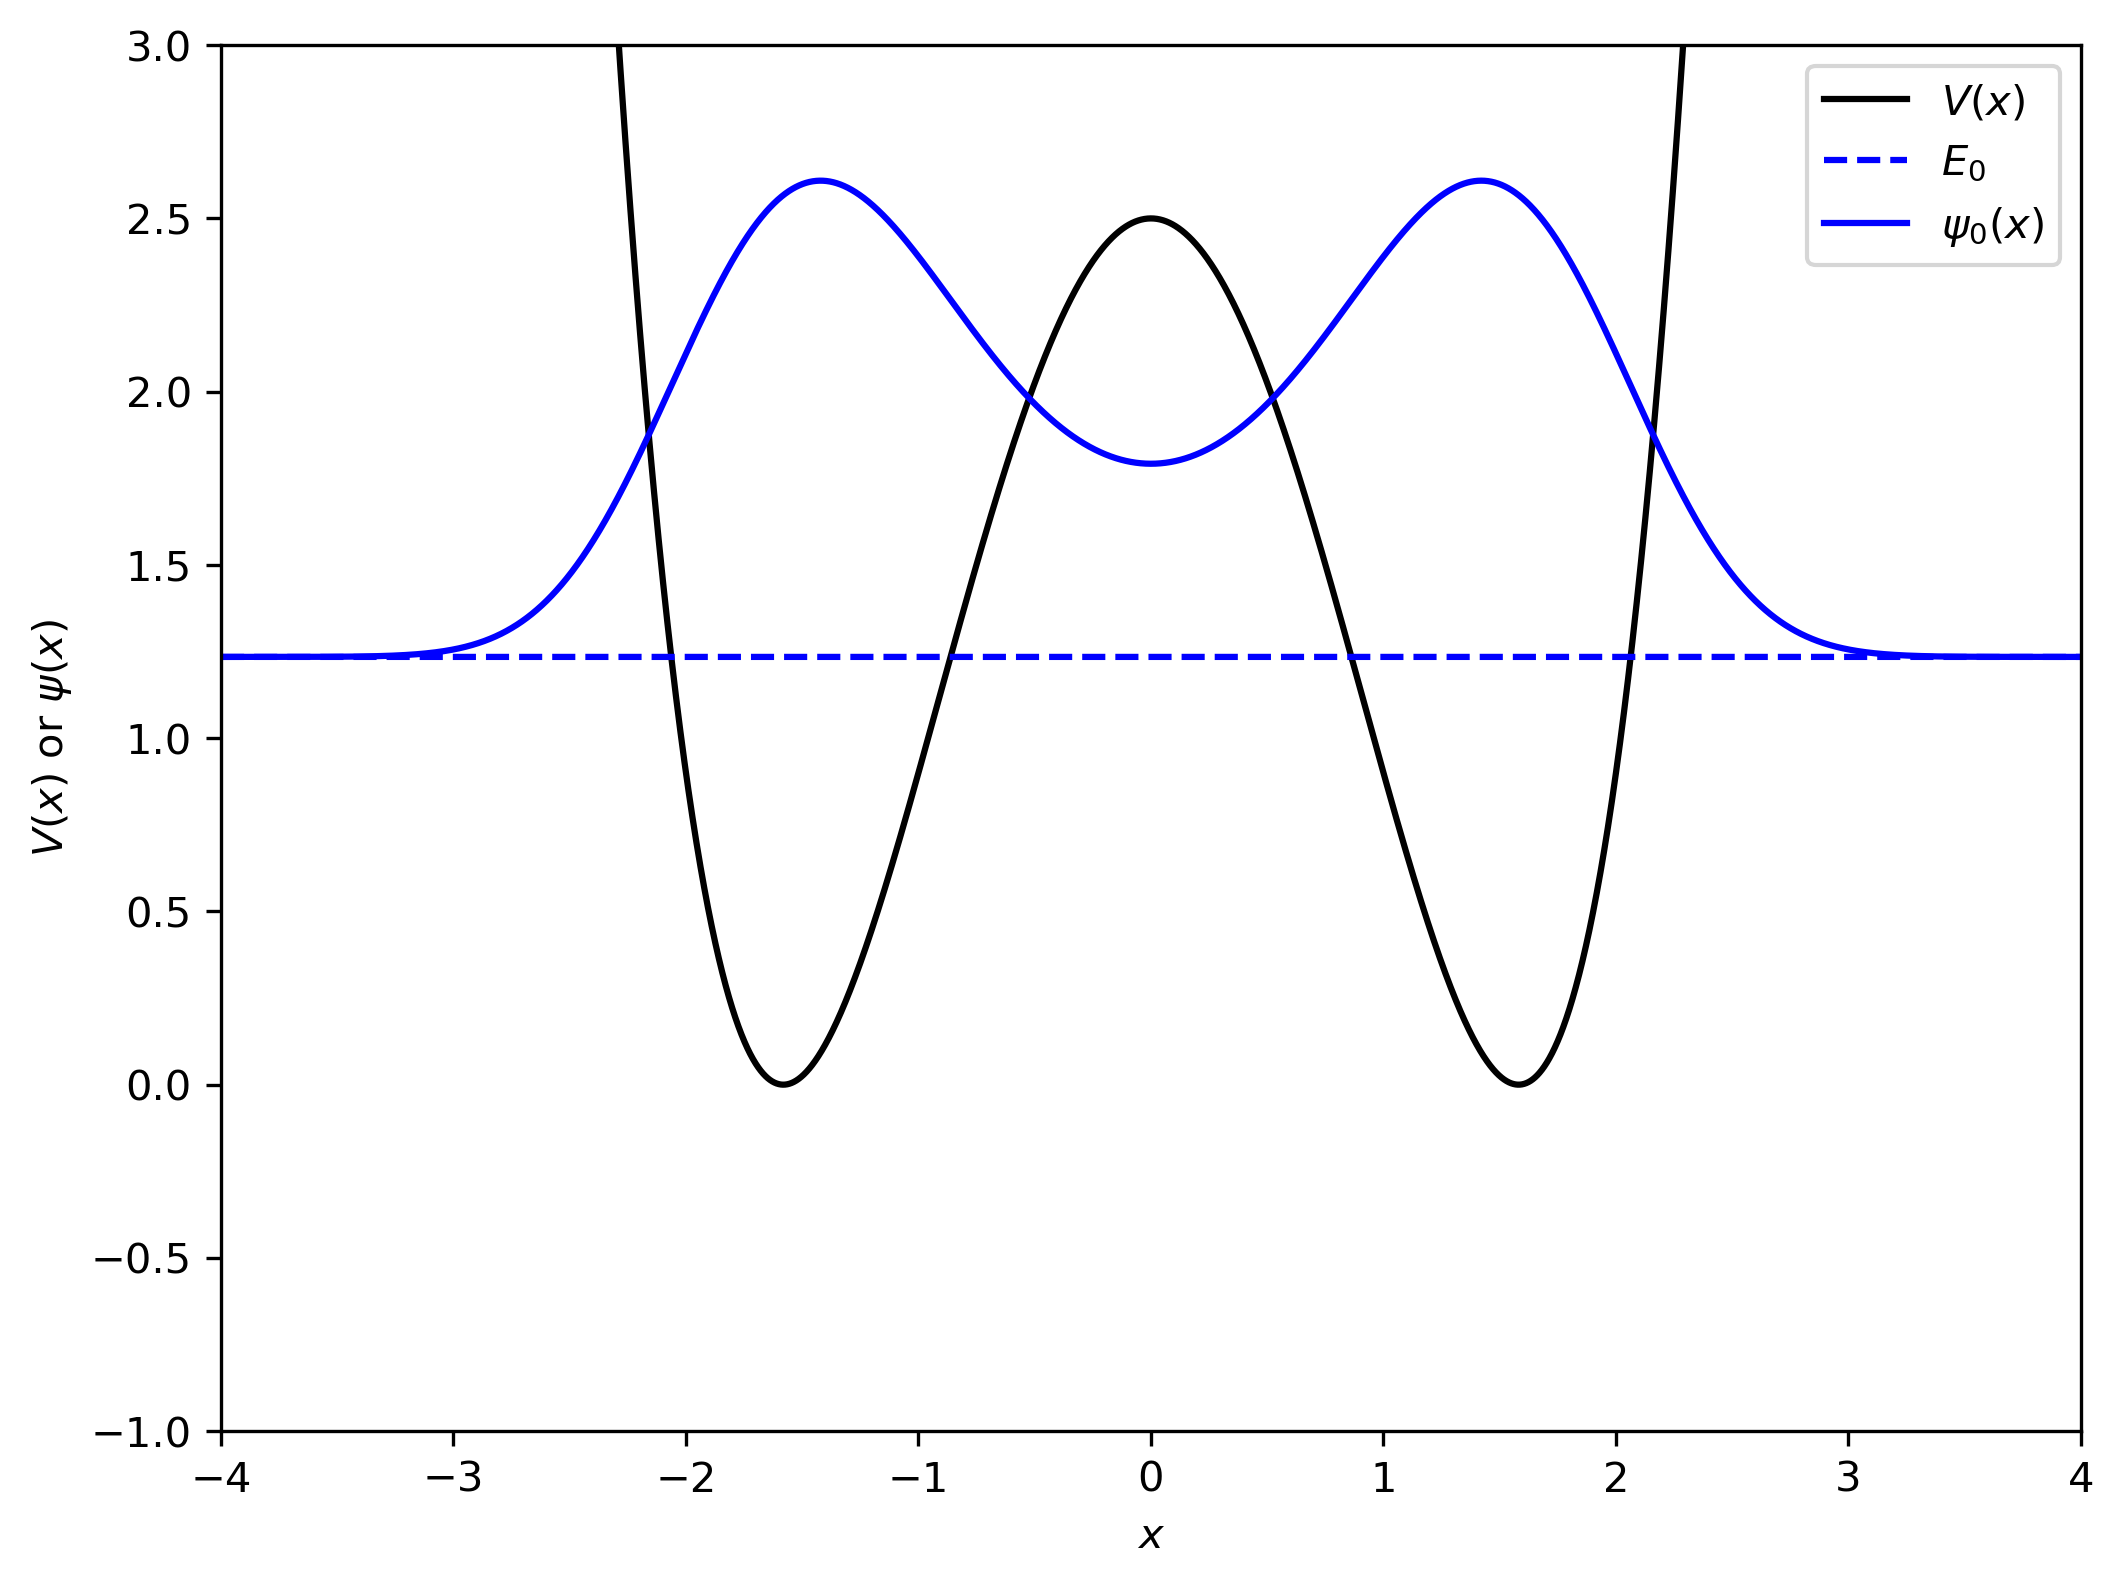

In [33]:
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.plot(x, lambda_0[-1]*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, u[-1] + lambda_0[-1], 'b-', label=f"$\psi_0(x)$")
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()

## Exercise: repeat for the second eigenvalue


In [34]:
n_iter = 80
u = [np.ones(ND + 1)]
lambda_0 = [np.dot(u[-1].conjugate(), H @ u[0]) / np.dot(u[-1].conjugate(), u[0])]
Hinv = scipy.linalg.inv((H-1.3*np.identity(ND+1)))
for i in range(n_iter):
    u.append(Hinv @ u[-1])
    u[-1] /= (np.sum(u[-1].conjugate() * u[-1]) * DELTAX)
    lambda_0.append(np.dot(u[-1].conjugate(), H @ u[-1]) / np.dot(u[-1].conjugate(), u[-1]))

print(lambda_0[-1])

1.2907243439735534


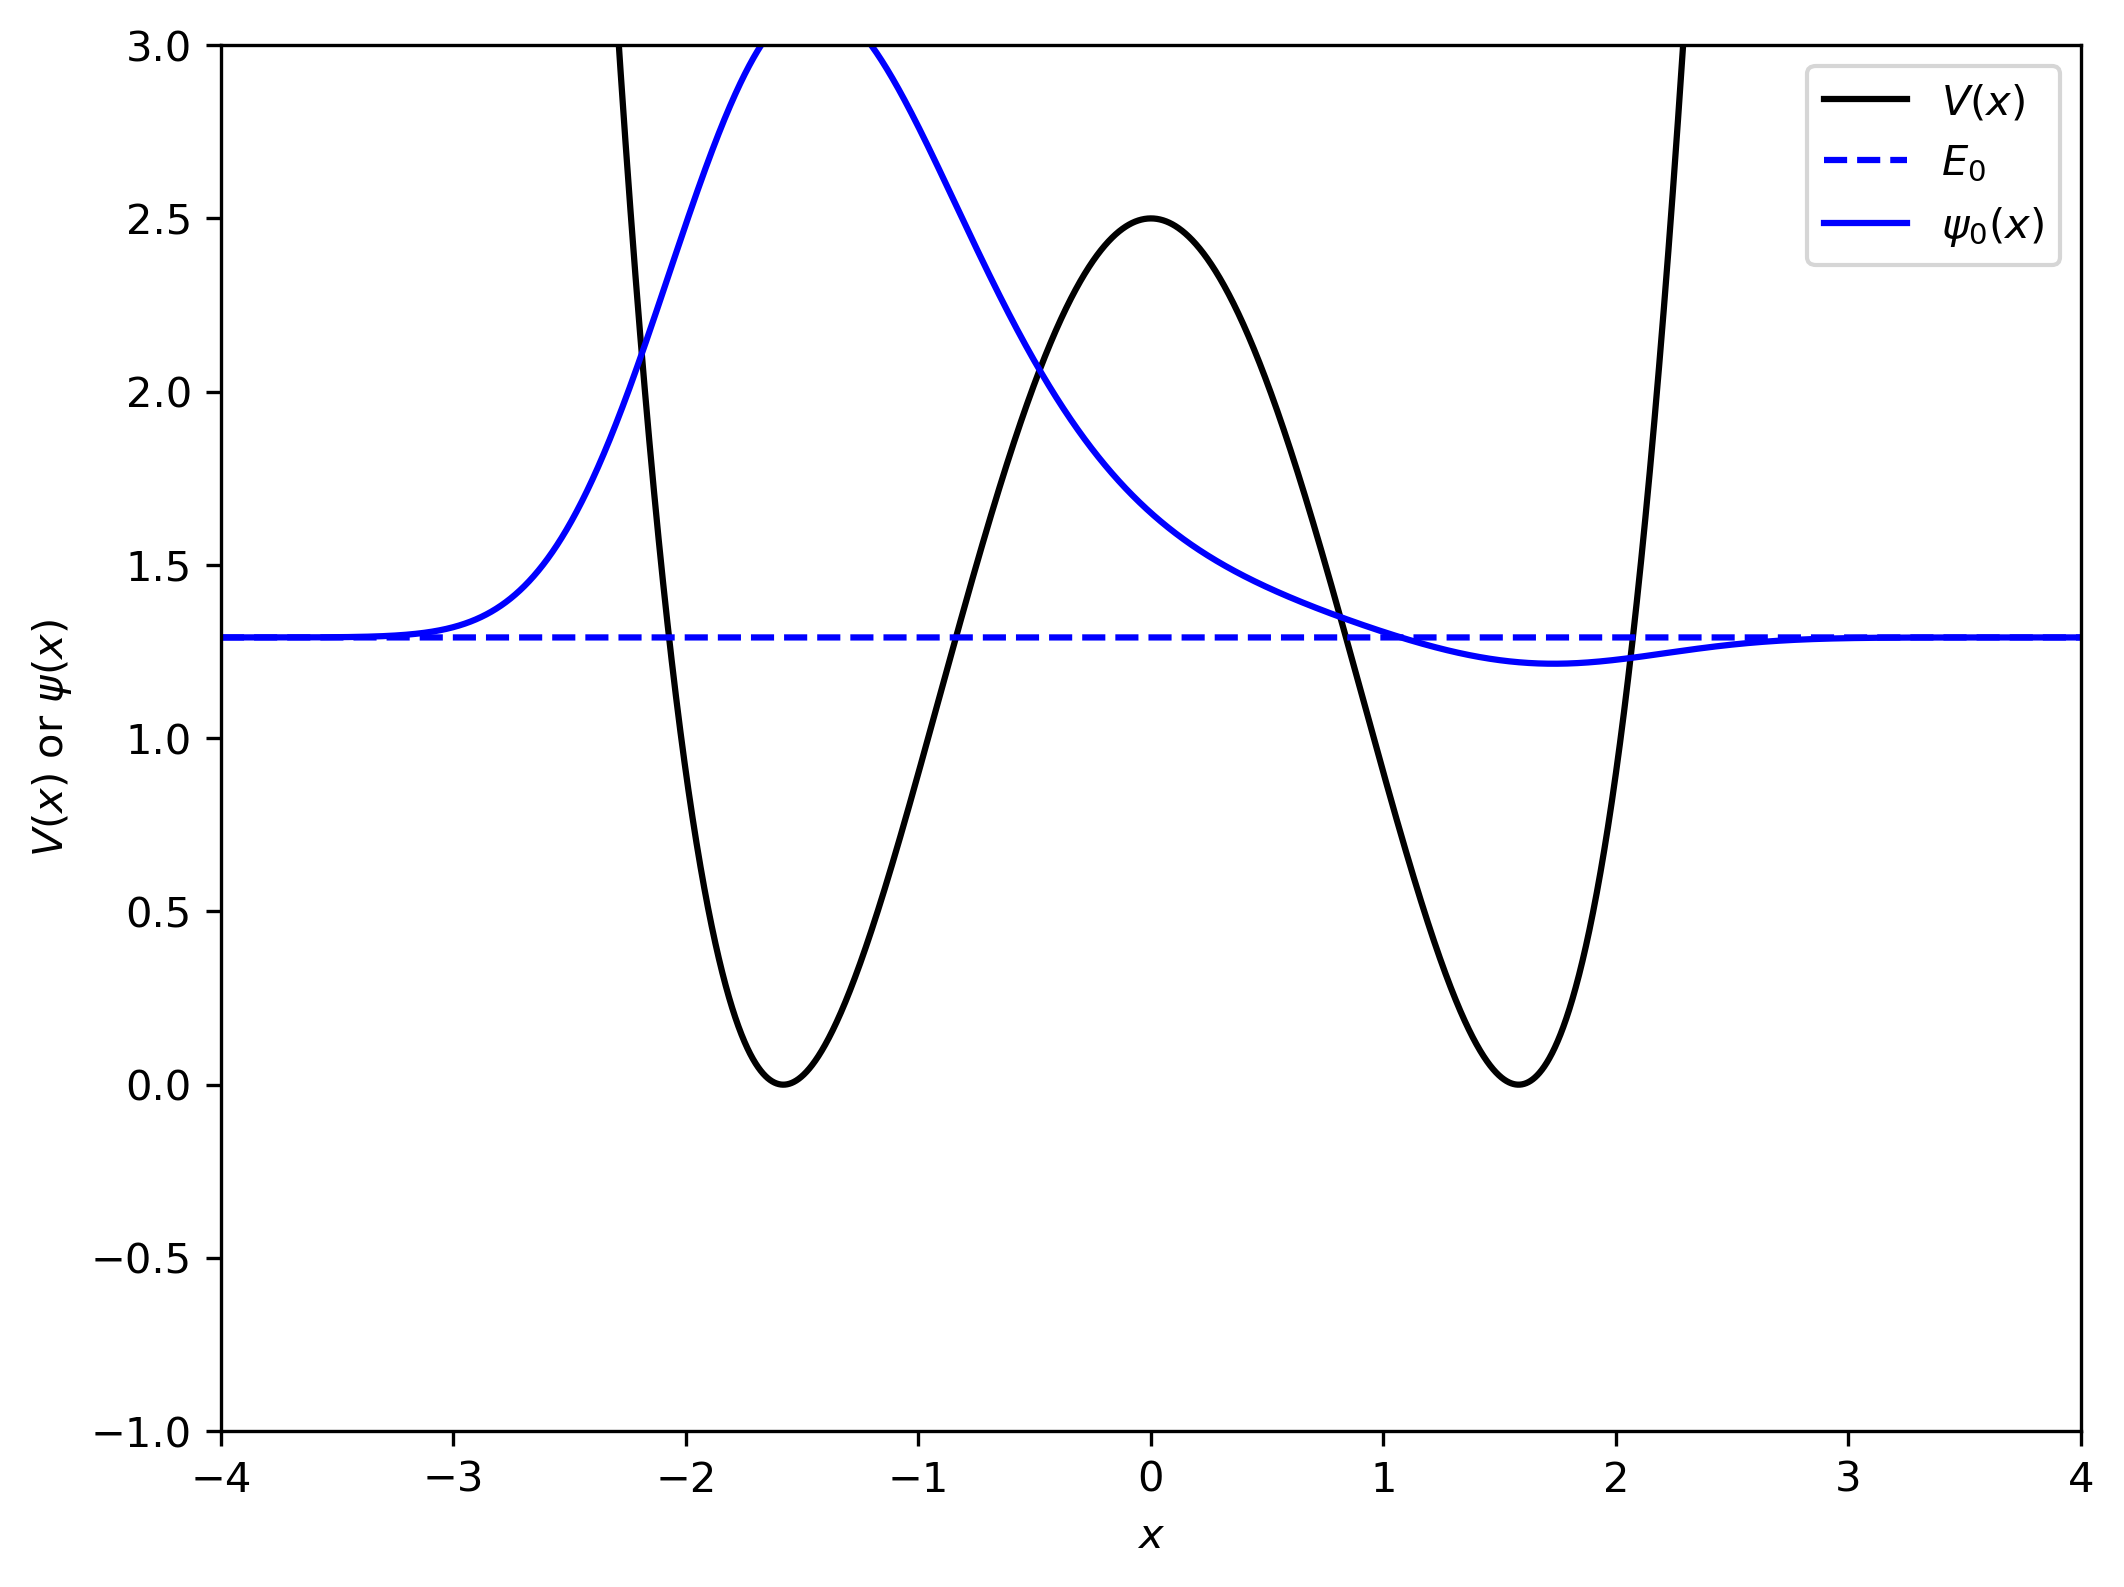

In [35]:
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.plot(x, lambda_0[-1]*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, u[-1] + lambda_0[-1], 'b-', label=f"$\psi_0(x)$")
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()

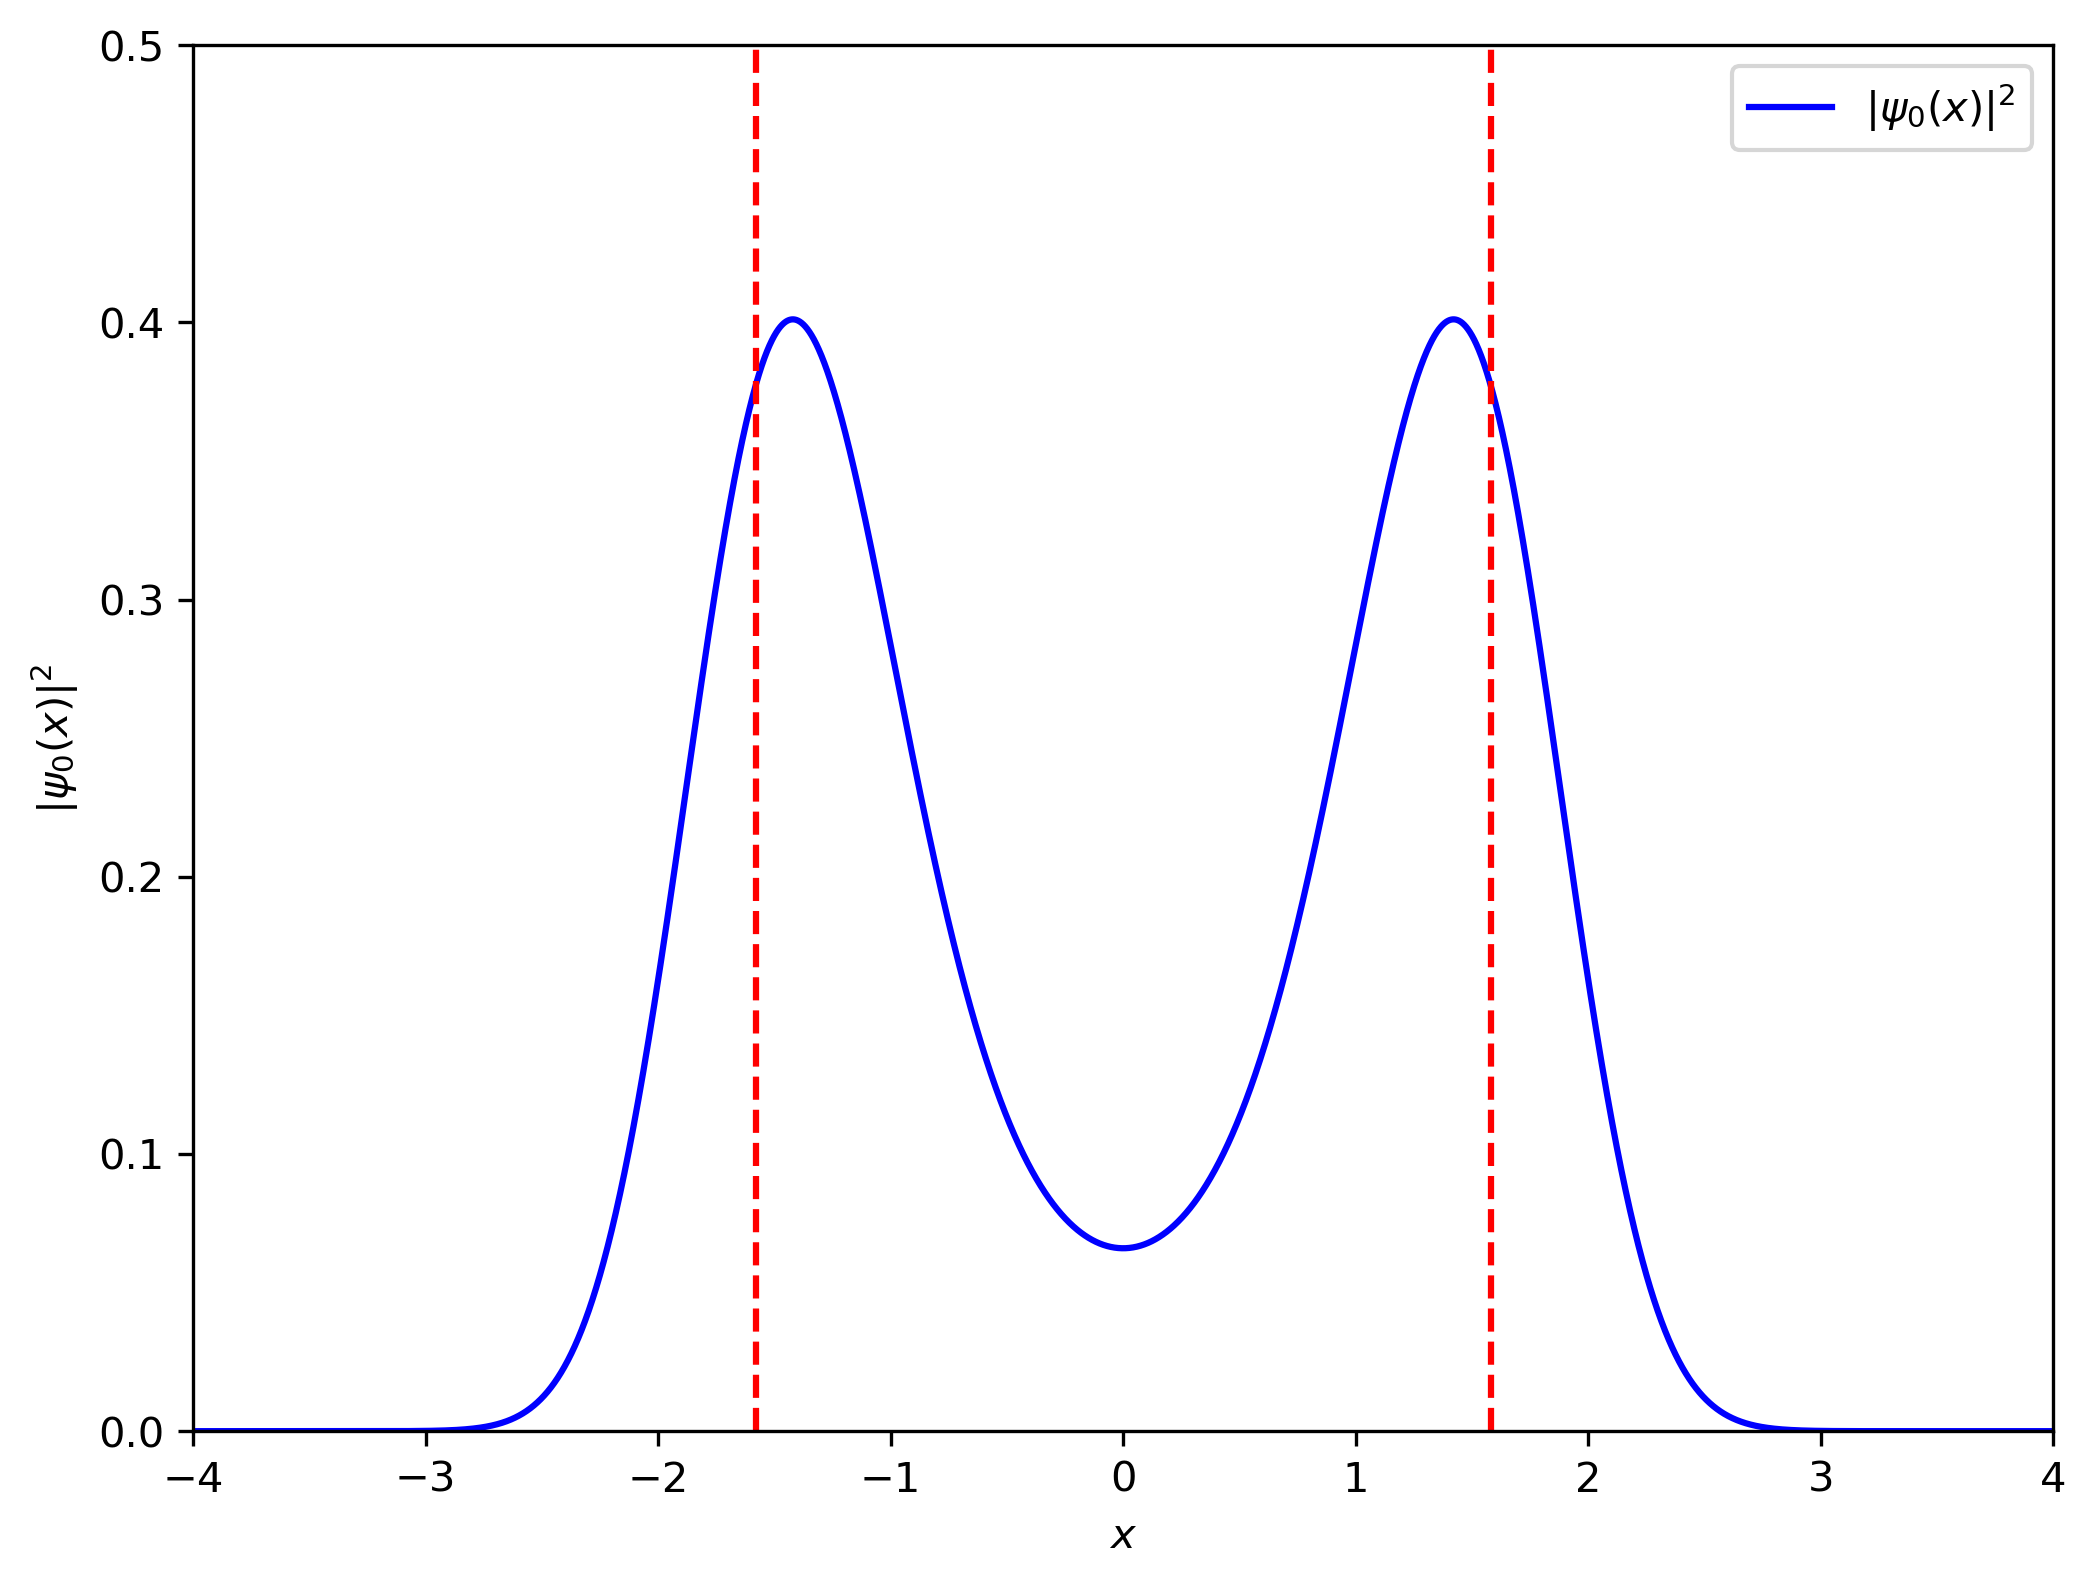

In [36]:
# Use psi_0 to plot the probability density
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, np.abs(psi_0)**2, 'b-', label=f"$|\psi_0(x)|^2$")
# Plot a vertical line at +/- 1/sqrt(ALPHA)
plt.axvline(-1/np.sqrt(ALPHA), color='r', linestyle='--')
plt.axvline(1/np.sqrt(ALPHA), color='r', linestyle='--')

plt.xlabel("$x$")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.xlim([xmin, xmax])
plt.ylim([0, 0.5])
plt.legend()
plt.show()